In [1]:
import dask
from dask import delayed
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [ ]:
kr= dd.read_csv('./6757_35417_compressed_kindle_reviews.csv/kindle_reviews.csv').compute()
kr.head()


In [4]:
a = kr.shape
a[0].compute(),a[1]

(982619, 10)

In [5]:
kr.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [6]:
kr.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, Unnamed: 0 to unixReviewTime
dtypes: object(7), int64(3)

In [7]:
#kr.apply(lambda x: sum(x.isnull()))
#kr.apply(func, axis=1)
kr.isnull().sum().compute()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.8.1


In [10]:
import cufflinks as cf

In [11]:
from plotly.offline import iplot
import chart_studio.plotly as py

In [12]:
init_notebook_mode(connected=True)
cf.go_offline()

In [13]:
kr['overall'].value_counts().compute()


5    575264
4    254013
3     96194
2     34130
1     23018
Name: overall, dtype: int64

In [14]:
kr['overall'].value_counts().compute().iplot(kind='bar')

In [ ]:
#kr['asin'].value_counts().compute().plot(kind="bar", ax=ax1, title="ASIN Frequency")

In [15]:
kr['asin'].value_counts().compute().iplot(kind="bar", title="ASIN Frequency")

In [16]:
col = kr.columns


In [17]:
col

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [18]:
col_drop = (['Unnamed: 0', 'helpful','reviewTime',
       'reviewerName', 'unixReviewTime'])

In [19]:
kr_final = kr.drop(col_drop, axis=1)


In [20]:
kr_final.head()

asin  overall                                         reviewText  \
0  B000F83SZQ        5  I enjoy vintage books and movies so I enjoyed ...   
1  B000F83SZQ        4  This book is a reissue of an old one; the auth...   
2  B000F83SZQ        4  This was a fairly interesting read.  It had ol...   
3  B000F83SZQ        5  I'd never read any of the Amy Brewster mysteri...   
4  B000F83SZQ        4  If you like period pieces - clothing, lingo, y...   

       reviewerID             summary  
0  A1F6404F1VG29J  Nice vintage story  
1   AN0N05A9LIJEQ        Different...  
2   A795DMNCJILA6               Oldie  
3  A1FV0SX13TWVXQ  I really liked it.  
4  A3SPTOKDG7WBLN      Period Mystery

In [21]:
kr_final["reviewerID"].unique().compute()

0        A1F6404F1VG29J
1         AN0N05A9LIJEQ
2         A795DMNCJILA6
3        A1FV0SX13TWVXQ
4        A3SPTOKDG7WBLN
              ...      
68218     A9TGHEH1OZISQ
68219    A23713UKOW6R4A
68220     AJ4AQ3Z6C1HHK
68221    A3HAKOACTS32CH
68222    A2Y1DUZLM79UYU
Name: reviewerID, Length: 68223, dtype: object

In [22]:
kr_final.groupby("reviewerID")["asin"].unique().compute()

reviewerID
A0010876CNE3ILIM9HV0     [B00332F4YE, B00AMNNTIA, B00ANFOCAG, B00B1V1A6...
A002359833QJM7OQHCXWY    [B004OEKH7Y, B006YSU6J2, B00B66PUX4, B00B7T64R...
A00463782V7TKAP9EMNL     [B004OEIRNA, B004XJ6922, B005KV1EHW, B0070Y4EG...
A006458827ALF2J23JJTO    [B003ZUYQE8, B004W9NIOU, B0050PJZLK, B008R0IZF...
A0089401235VSN3Z6F3HK    [B000JMLBHU, B003ZUYQE8, B0044UHUK0, B008OA1HP...
                                               ...                        
AR807ISKXQ5ZW            [B00K2I13ME, B00KCE1ISM, B00L0QZ828, B00LA6OOV...
AW4JL9KDSB0ND            [B00K6KBKEY, B00KD2FNJI, B00KYXLLUQ, B00L8CO9L...
AY9AIGZKJYC6T            [B00K08O4B8, B00K9QUXAC, B00L0SI6TI, B00L4LLR6...
AZAXM9G2ANV8B            [B00KKRHQNC, B00KLD8GXY, B00KPHGSKY, B00KR1RMD...
AZWO61ZAN54ZV            [B00KAJE9YE, B00KLRM1NQ, B00KSFTUAI, B00KXIIZ3...
Name: asin, Length: 68223, dtype: object

In [98]:
x = kr_final.reviewerID.value_counts().compute()
x.to_dict()
print("converted Series to dictionary")

converted Series to dictionary


In [116]:
 kr_final["reviewerID"].compute()

0        A1F6404F1VG29J
1         AN0N05A9LIJEQ
2         A795DMNCJILA6
3        A1FV0SX13TWVXQ
4        A3SPTOKDG7WBLN
              ...      
78272    A2Y66HD4J5S7QZ
78273    A17YHECC8H9NEY
78274    A20KO0BPMNREJL
78275    A1BQO66R6OLCCW
78276    A2NRGE3CSFY2TQ
Name: reviewerID, Length: 982619, dtype: object

In [23]:
kr_final.describe().compute()

overall
count  982619.000000
mean        4.347801
std         0.955056
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

Based on the descriptive statistics above, we see the following:

Average review score of 4.34, with low standard deviation.
Almost most review are positive starting from the 1rst quartile 

In [24]:
kr_final["asin"].unique().compute()

0        B000F83SZQ
1        B000FA64PA
2        B000FA64PK
3        B000FA64QO
4        B000FBFMVG
            ...    
61929    B00LZFHL7Y
61930    B00LZKMXBI
61931    B00M029T4O
61932    B00M0RE7CS
61933    B00M13FNSS
Name: asin, Length: 61934, dtype: object

In [25]:
asins_unique = len(kr_final["asin"].unique().compute())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 61934


In [26]:
kr_final.groupby("asin")["overall"].unique().compute()


asin
B000F83SZQ          [5, 4]
B000FA64PA       [5, 4, 3]
B000FA64PK       [3, 5, 4]
B000FA64QO    [2, 5, 4, 3]
B000FBFMVG       [5, 3, 4]
                  ...     
B00LZFHL7Y       [5, 3, 4]
B00LZKMXBI       [5, 4, 3]
B00M029T4O          [5, 4]
B00M0RE7CS          [5, 4]
B00M13FNSS          [4, 5]
Name: overall, Length: 61934, dtype: object

In [27]:
#Adding new features to dataframe.
kr_final["sentiment"] = kr_final["overall"].apply(lambda score: "positive" if score >3 else \
                                              ("negative" if score < 3 else "neutral"))

C:\Users\Omistaja\anaconda3\lib\site-packages\dask\dataframe\core.py:3046: UserWarning:


You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('overall', 'object'))




In [30]:
kr_final["sentiment"].head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: sentiment, dtype: object

In [31]:
kr_final["sentiment"].value_counts().compute().iplot(kind='bar')

Therefore we could conclude that the positive reviews are way more than the negative reviews.

## POPULAR WORDS FOR BOTH POSETIVE AND NEGATIVE SENTIMENTS

In [32]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt

In [33]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omistaja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omistaja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#data = kr_final.loc[0:200]

In [35]:
kr_final.head()

asin  overall                                         reviewText  \
0  B000F83SZQ        5  I enjoy vintage books and movies so I enjoyed ...   
1  B000F83SZQ        4  This book is a reissue of an old one; the auth...   
2  B000F83SZQ        4  This was a fairly interesting read.  It had ol...   
3  B000F83SZQ        5  I'd never read any of the Amy Brewster mysteri...   
4  B000F83SZQ        4  If you like period pieces - clothing, lingo, y...   

       reviewerID             summary sentiment  
0  A1F6404F1VG29J  Nice vintage story  positive  
1   AN0N05A9LIJEQ        Different...  positive  
2   A795DMNCJILA6               Oldie  positive  
3  A1FV0SX13TWVXQ  I really liked it.  positive  
4  A3SPTOKDG7WBLN      Period Mystery  positive

In [82]:
pos = kr_final.loc[kr_final['sentiment'] == 'positive']
pos = pos.loc[0:200]
neu = kr_final.loc[kr_final['sentiment'] == 'neutral']
neu = neu.loc[0:200]
neg = kr_final.loc[kr_final['sentiment'] == 'negative']
neg = neg.loc[0:200]

In [72]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["summary"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [73]:
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))
neu_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neu))

In [74]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

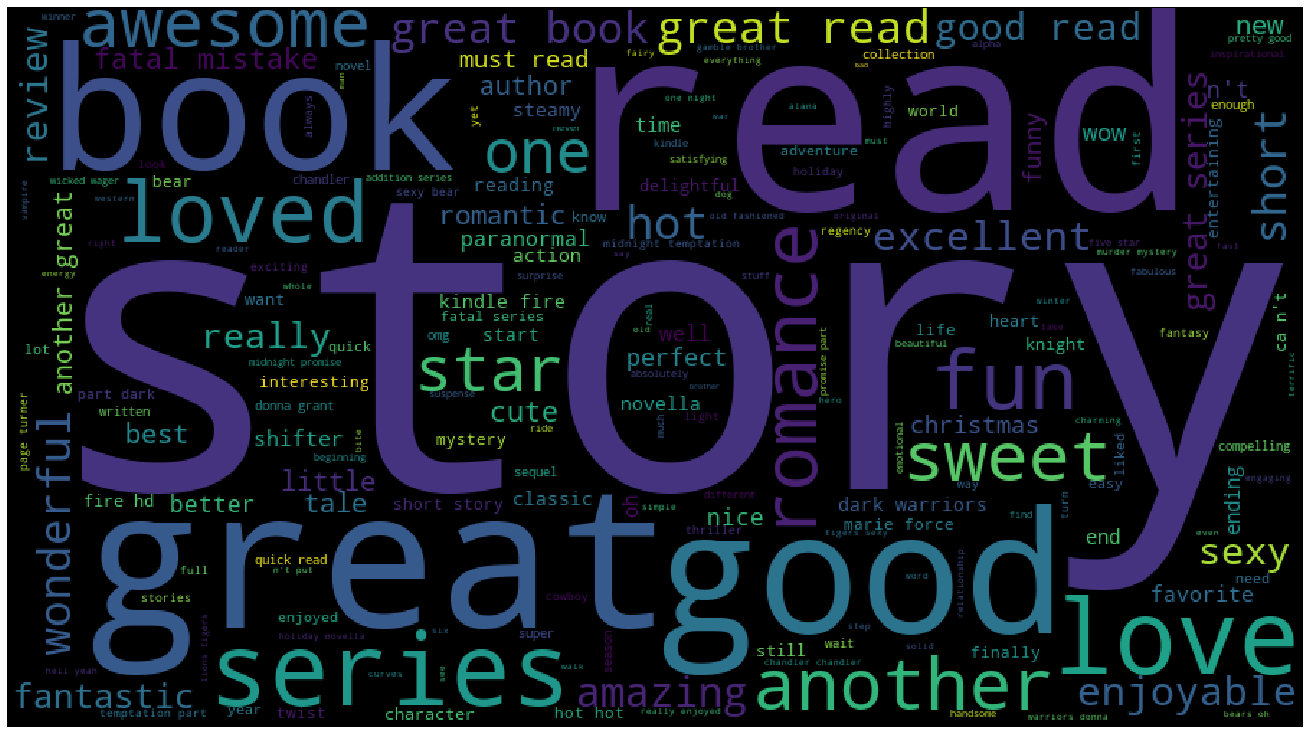

In [78]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

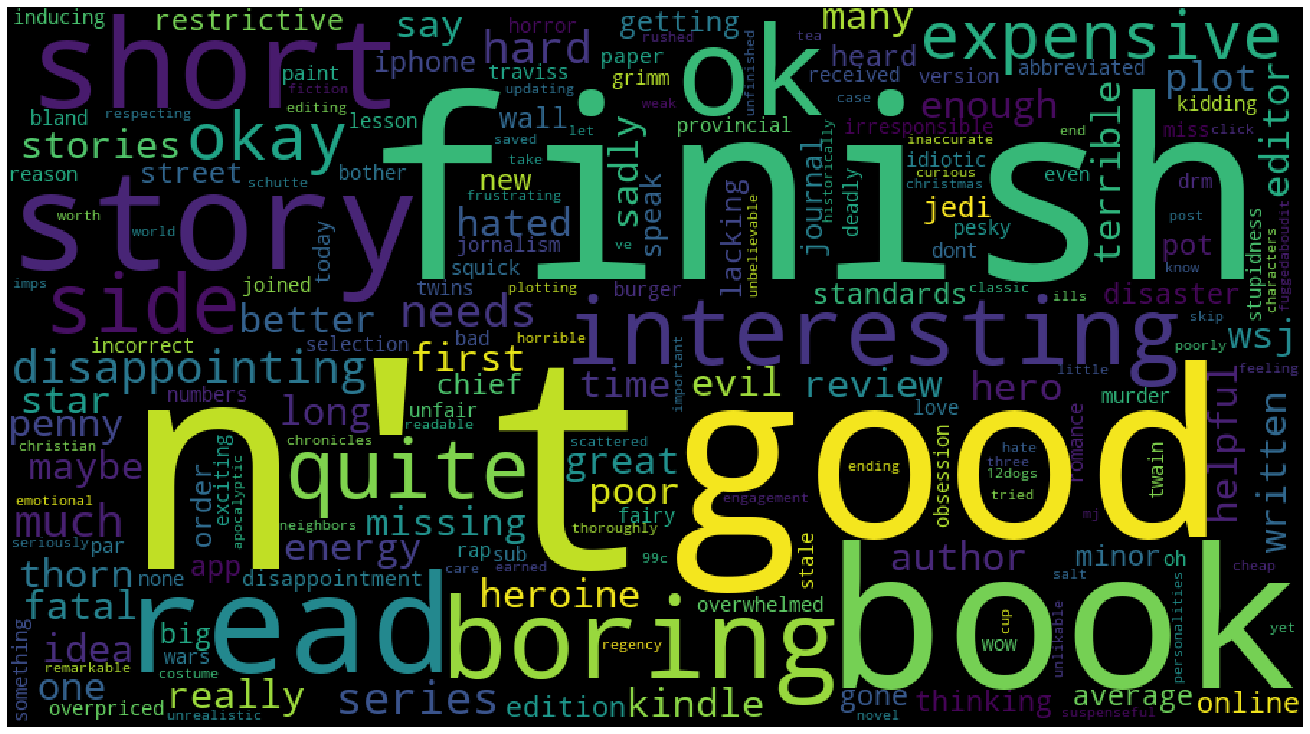

In [68]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

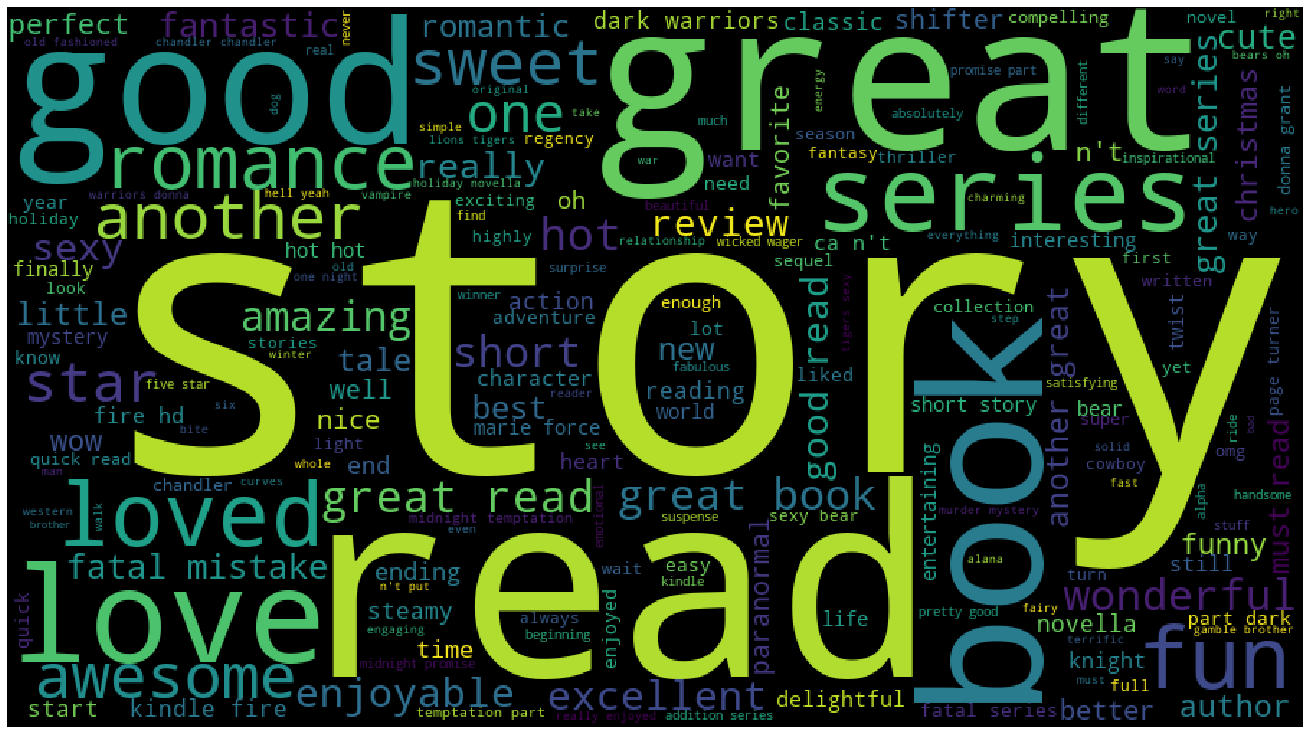

In [79]:
#Visuallizing popular neutral words
plot_Cloud(neu_wordcloud)

In [83]:
col

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [85]:
col_drop2=(['Unnamed: 0','reviewTime',
       'reviewerName', 'unixReviewTime'])

In [86]:
kr_df= kr.drop(col_drop, axis=1)

In [87]:
kr_df.head()

asin helpful  overall  \
0  B000F83SZQ  [0, 0]        5   
1  B000F83SZQ  [2, 2]        4   
2  B000F83SZQ  [2, 2]        4   
3  B000F83SZQ  [1, 1]        5   
4  B000F83SZQ  [0, 1]        4   

                                          reviewText      reviewerID  \
0  I enjoy vintage books and movies so I enjoyed ...  A1F6404F1VG29J   
1  This book is a reissue of an old one; the auth...   AN0N05A9LIJEQ   
2  This was a fairly interesting read.  It had ol...   A795DMNCJILA6   
3  I'd never read any of the Amy Brewster mysteri...  A1FV0SX13TWVXQ   
4  If you like period pieces - clothing, lingo, y...  A3SPTOKDG7WBLN   

              summary  
0  Nice vintage story  
1        Different...  
2               Oldie  
3  I really liked it.  
4      Period Mystery

In [95]:
#Checking the value count for 'Helpfulness'
#If the helpful column has value [2,3] that means 2 out of 5 users found it helpful.

kr_df.helpful.value_counts().compute()

[0, 0]      530329
[1, 1]      190162
[2, 2]       54886
[0, 1]       37701
[1, 2]       31318
             ...  
[41, 60]         1
[41, 59]         1
[41, 57]         1
[41, 56]         1
[34, 49]         1
Name: helpful, Length: 1494, dtype: int64

In [97]:
kr_df[kr_df.overall==5].helpful.value_counts().compute()

[0, 0]        304560
[1, 1]        125744
[2, 2]         36823
[1, 2]         16693
[3, 3]         15474
               ...  
[52, 61]           1
[22, 32]           1
[22, 52]           1
[221, 225]         1
[99, 102]          1
Name: helpful, Length: 781, dtype: int64